In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import talib as ta
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_file, convert

In [4]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbols

['ETH/USDT',
 'BTC/USDT',
 'BNB/USDT',
 'SOL/USDT',
 'ADA/USDT',
 'LINK/USDT',
 'XRP/USDT',
 'LTC/USDT',
 'XLM/USDT']

In [5]:
symbol = symbols[0]
symbol

'ETH/USDT'

In [6]:
data = read_file.read_raw_training_data(symbol)
data

,open,high,low,close,volume
timestamp,,,,,
2020-06-01 00:00:00,231.56,233.78,230.66,233.30,29866.21677
2020-06-01 01:00:00,233.29,237.23,232.33,236.67,37253.78427
2020-06-01 02:00:00,236.61,239.98,236.38,238.37,48304.67869
2020-06-01 03:00:00,238.32,239.27,237.96,238.79,16084.16724
2020-06-01 04:00:00,238.79,242.50,238.79,239.92,42681.50588
...,...,...,...,...,...
2024-09-29 20:00:00,2666.77,2673.41,2658.01,2660.89,7578.82390
2024-09-29 21:00:00,2660.89,2668.77,2660.12,2666.63,3511.73450
2024-09-29 22:00:00,2666.62,2671.52,2655.50,2655.82,6182.30880


In [7]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [8]:
data['rsi'] = ta.RSI(data['close'], timeperiod=14)
data.head(100)

,open,high,low,close,volume,rsi
timestamp,,,,,,
2020-06-01 00:00:00,231.56,233.78,230.66,233.30,29866.21677,NaN
2020-06-01 01:00:00,233.29,237.23,232.33,236.67,37253.78427,NaN
2020-06-01 02:00:00,236.61,239.98,236.38,238.37,48304.67869,NaN
2020-06-01 03:00:00,238.32,239.27,237.96,238.79,16084.16724,NaN
2020-06-01 04:00:00,238.79,242.50,238.79,239.92,42681.50588,NaN
...,...,...,...,...,...,...
2020-06-04 23:00:00,243.36,244.64,242.80,243.21,20900.38192,52.347650
2020-06-05 00:00:00,243.22,243.88,241.65,243.56,17007.34190,53.432450
2020-06-05 01:00:00,243.55,245.30,243.25,244.40,23590.74491,56.020154


In [9]:
close = data['close']
high = data['high']
low = data['low']
volume = data['volume']

# --- 1. Momentum & Oscillators ---

# RSI (Relative Strength Index)
data['rsi'] = ta.RSI(data['close'], timeperiod=14)

# Momentum (MOM)
data['momentum'] = ta.MOM(close, timeperiod=10)

# Stochastic (Returns K and D lines)
slowk, slowd = ta.STOCH(high, low, close, fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
data['stochastic_oscillator-fast'] = slowk
data['stochastic_oscillator-slow'] = slowd

# MACD (Returns MACD, Signal, Hist)
macd, macdsignal, macdhist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
data['macd-line'] = macd
data['macd-signal'] = macdsignal
data['macd-hist'] = macdhist

# CCI (Commodity Channel Index)
data['cci'] = ta.CCI(high, low, close, timeperiod=14)

# ADX (Average Directional Movement Index)
data['adx'] = ta.ADX(high, low, close, timeperiod=14)

# TRIX (1-day Rate-Of-Change (ROC) of a Triple Smooth EMA)
data['trix'] = ta.TRIX(close, timeperiod=30)

# ROC (Rate of Change)
data['roc'] = ta.ROC(close, timeperiod=10)

# MFI (Money Flow Index) - Requires Volume
data['mfi'] = ta.MFI(high, low, close, volume.astype(float), timeperiod=14)

# CMO (Chande Momentum Oscillator)
data['cmo'] = ta.CMO(close, timeperiod=14)

# ULTOSC (Ultimate Oscillator) - Standard weights: 7, 14, 28
data['uo'] = ta.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)

# BOP (Balance Of Power)
data['bop'] = ta.BOP(open=data['open'], high=high, low=low, close=close)

# StochRSI (Returns FastK, FastD)
fastk, fastd = ta.STOCHRSI(close, timeperiod=14, fastk_period=14, fastd_period=3, fastd_matype=0)
data['stoch-rsi'] = fastk

# --- 2. Trend ---

# SMA (Simple Moving Average)
data['sma-50'] = ta.SMA(data['close'], timeperiod=50)
data['sma-100'] = ta.SMA(data['close'], timeperiod=100)
data['sma-200'] = ta.SMA(data['close'], timeperiod=200)

# EMS (Exponential Moving Average)
data['ema-50'] = ta.EMA(data['close'], timeperiod=50)
data['ema-100'] = ta.EMA(data['close'], timeperiod=100)
data['ema-200'] = ta.EMA(data['close'], timeperiod=200)

# WMA (Weighted Moving Average)
data['wma-50'] = ta.WMA(close, timeperiod=50)

# DEMA (Double Exponential Moving Average)
data['dema-50'] = ta.DEMA(close, timeperiod=50)

# TEMA (Triple Exponential Moving Average)
data['tema-50'] = ta.TEMA(close, timeperiod=50)

# TRIMA (Triangular Moving Average)
data['trima-50'] = ta.TRIMA(close, timeperiod=50)

# SAR (Parabolic SAR)
data['sar'] = ta.SAR(high, low, acceleration=0.02, maximum=0.2)

# --- 3. Volume ---

# OBV (On Balance Volume)
data['obv'] = ta.OBV(close, volume.astype(float))

# --- 4. Volatility ---

# ATR (Average True Range)
data['atr'] = ta.ATR(high, low, close, timeperiod=14)
data

,open,high,low,close,volume,rsi,momentum,stochastic_oscillator-fast,stochastic_oscillator-slow,macd-line,...,ema-50,ema-100,ema-200,wma-50,dema-50,tema-50,trima-50,sar,obv,atr
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00,231.56,233.78,230.66,233.30,29866.21677,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29866.21677,NaN
2020-06-01 01:00:00,233.29,237.23,232.33,236.67,37253.78427,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.660000,67120.00104,NaN
2020-06-01 02:00:00,236.61,239.98,236.38,238.37,48304.67869,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.791400,115424.67973,NaN
2020-06-01 03:00:00,238.32,239.27,237.96,238.79,16084.16724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.158944,131508.84697,NaN
2020-06-01 04:00:00,238.79,242.50,238.79,239.92,42681.50588,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.511786,174190.35285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-29 20:00:00,2666.77,2673.41,2658.01,2660.89,7578.82390,48.813728,14.26,78.567929,77.387957,-1.737900,...,2663.076883,2653.467245,2617.450630,2664.859278,2666.823256,2658.589692,2670.372031,2635.962009,368016.51719,12.751045
2024-09-29 21:00:00,2660.89,2668.77,2660.12,2666.63,3511.73450,52.879972,14.14,80.704332,79.475183,-1.126676,...,2663.216221,2653.727894,2617.939977,2664.648125,2666.949551,2659.026341,2669.589754,2638.208889,371528.25169,12.458113
2024-09-29 22:00:00,2666.62,2671.52,2655.50,2655.82,6182.30880,45.542371,9.65,68.029364,75.767208,-1.497293,...,2662.926173,2653.769322,2618.316893,2664.040298,2666.234425,2658.213520,2668.824385,2640.320956,365345.94289,12.712534


In [10]:
data = data.drop(columns=['open', 'high', 'low', 'close']).dropna().copy()
data

,volume,rsi,momentum,stochastic_oscillator-fast,stochastic_oscillator-slow,macd-line,macd-signal,macd-hist,cci,adx,...,ema-50,ema-100,ema-200,wma-50,dema-50,tema-50,trima-50,sar,obv,atr
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-09 07:00:00,11143.32729,51.558938,0.48,45.036661,43.842828,0.214510,0.277245,-0.062735,21.531286,15.703667,...,242.679287,242.219997,241.704750,242.898243,243.305189,243.644101,242.590954,248.684344,294386.67785,1.790578
2020-06-09 08:00:00,11934.69827,50.927553,0.63,44.444444,44.312841,0.193279,0.260451,-0.067173,-4.151584,15.278251,...,242.700491,242.239799,241.719827,242.939490,243.322221,243.643834,242.669354,248.470657,282451.97958,1.740537
2020-06-09 09:00:00,8218.14667,48.320636,-3.63,43.203610,44.228238,0.138545,0.236070,-0.097525,-60.612782,15.099378,...,242.703217,242.250298,241.730277,242.962314,243.303185,243.591276,242.744723,248.261244,274233.83291,1.684784
2020-06-09 10:00:00,17931.20625,46.117328,-1.41,40.524535,42.724196,0.062972,0.201450,-0.138479,-135.348068,15.655897,...,242.690542,242.252867,241.736742,242.969467,243.254803,243.497291,242.815554,248.056019,256302.62666,1.686586
2020-06-09 11:00:00,13347.10235,51.819753,-0.50,40.806543,41.511562,0.078030,0.176766,-0.098736,-41.286024,15.760456,...,242.715227,242.273998,241.752495,243.013200,243.281076,243.515581,242.882508,247.854899,269649.72901,1.648258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-29 20:00:00,7578.82390,48.813728,14.26,78.567929,77.387957,-1.737900,-3.491123,1.753222,82.160643,20.204306,...,2663.076883,2653.467245,2617.450630,2664.859278,2666.823256,2658.589692,2670.372031,2635.962009,368016.51719,12.751045
2024-09-29 21:00:00,3511.73450,52.879972,14.14,80.704332,79.475183,-1.126676,-3.018233,1.891558,78.675053,18.972465,...,2663.216221,2653.727894,2617.939977,2664.648125,2666.949551,2659.026341,2669.589754,2638.208889,371528.25169,12.458113
2024-09-29 22:00:00,6182.30880,45.542371,9.65,68.029364,75.767208,-1.497293,-2.714045,1.216752,33.397356,17.937191,...,2662.926173,2653.769322,2618.316893,2664.040298,2666.234425,2658.213520,2668.824385,2640.320956,365345.94289,12.712534


In [11]:
scaled_data = pd.DataFrame()
for col in data.columns:
    rolling_min = data[col].rolling(window=config['data']['normalization_window'],
                               min_periods=config['data']['normalization_window']).min()
    rolling_max = data[col].rolling(window=config['data']['normalization_window'],
                               min_periods=config['data']['normalization_window']).max()
    rolling_range = rolling_max - rolling_min + 1e-9

    scaled_data[col] = (data[col] - rolling_min) / rolling_range

In [12]:
corr_matrix = scaled_data.corr()
corr_matrix

,volume,rsi,momentum,stochastic_oscillator-fast,stochastic_oscillator-slow,macd-line,macd-signal,macd-hist,cci,adx,...,ema-50,ema-100,ema-200,wma-50,dema-50,tema-50,trima-50,sar,obv,atr
volume,1.000000,-0.049764,-0.044679,-0.024838,-0.019063,-0.029127,-0.020610,-0.038500,-0.049084,0.197993,...,0.034664,0.044894,0.054355,0.029604,0.020115,0.014510,0.031045,0.017471,0.031725,0.402622
rsi,-0.049764,1.000000,0.759452,0.749621,0.715085,0.828933,0.696103,0.565480,0.744854,-0.040425,...,-0.091267,-0.178060,-0.201714,-0.064561,0.046052,0.156847,-0.190693,0.029138,0.279238,-0.103005
momentum,-0.044679,0.759452,1.000000,0.694964,0.664544,0.621650,0.417712,0.833921,0.682093,-0.029449,...,-0.271863,-0.306217,-0.281664,-0.260854,-0.194191,-0.122285,-0.327277,-0.253503,0.071083,-0.085793
stochastic_oscillator-fast,-0.024838,0.749621,0.694964,1.000000,0.954100,0.524771,0.333339,0.689643,0.792250,-0.001710,...,0.032950,0.004602,0.000217,0.029693,0.076056,0.127324,-0.037014,-0.045366,0.284581,-0.017745
stochastic_oscillator-slow,-0.019063,0.715085,0.664544,0.954100,1.000000,0.578699,0.399378,0.665396,0.673545,-0.008382,...,0.040859,0.006337,-0.001232,0.038408,0.092837,0.152418,-0.039974,0.000964,0.282385,-0.025504
macd-line,-0.029127,0.828933,0.621650,0.524771,0.578699,1.000000,0.953648,0.346983,0.417769,-0.061480,...,-0.127021,-0.250104,-0.280808,-0.079983,0.065687,0.209078,-0.236447,0.140822,0.236840,-0.097690
macd-signal,-0.020610,0.696103,0.417712,0.333339,0.399378,0.953648,1.000000,0.092026,0.236627,-0.067563,...,-0.058472,-0.201887,-0.251056,0.000774,0.154023,0.300997,-0.162425,0.259988,0.253878,-0.086798
macd-hist,-0.038500,0.565480,0.833921,0.689643,0.665396,0.346983,0.092026,1.000000,0.636802,0.004097,...,-0.272134,-0.239857,-0.191992,-0.298165,-0.292070,-0.273732,-0.318381,-0.370910,-0.032586,-0.064496
cci,-0.049084,0.744854,0.682093,0.792250,0.673545,0.417769,0.236627,0.636802,1.000000,-0.017374,...,-0.098452,-0.118879,-0.102049,-0.097177,-0.056870,-0.011837,-0.142469,-0.182636,0.170286,-0.038269
adx,0.197993,-0.040425,-0.029449,-0.001710,-0.008382,-0.061480,-0.067563,0.004097,-0.017374,1.000000,...,0.009588,0.040877,0.037802,-0.001831,-0.032396,-0.054465,0.023271,-0.048460,-0.011606,0.379780


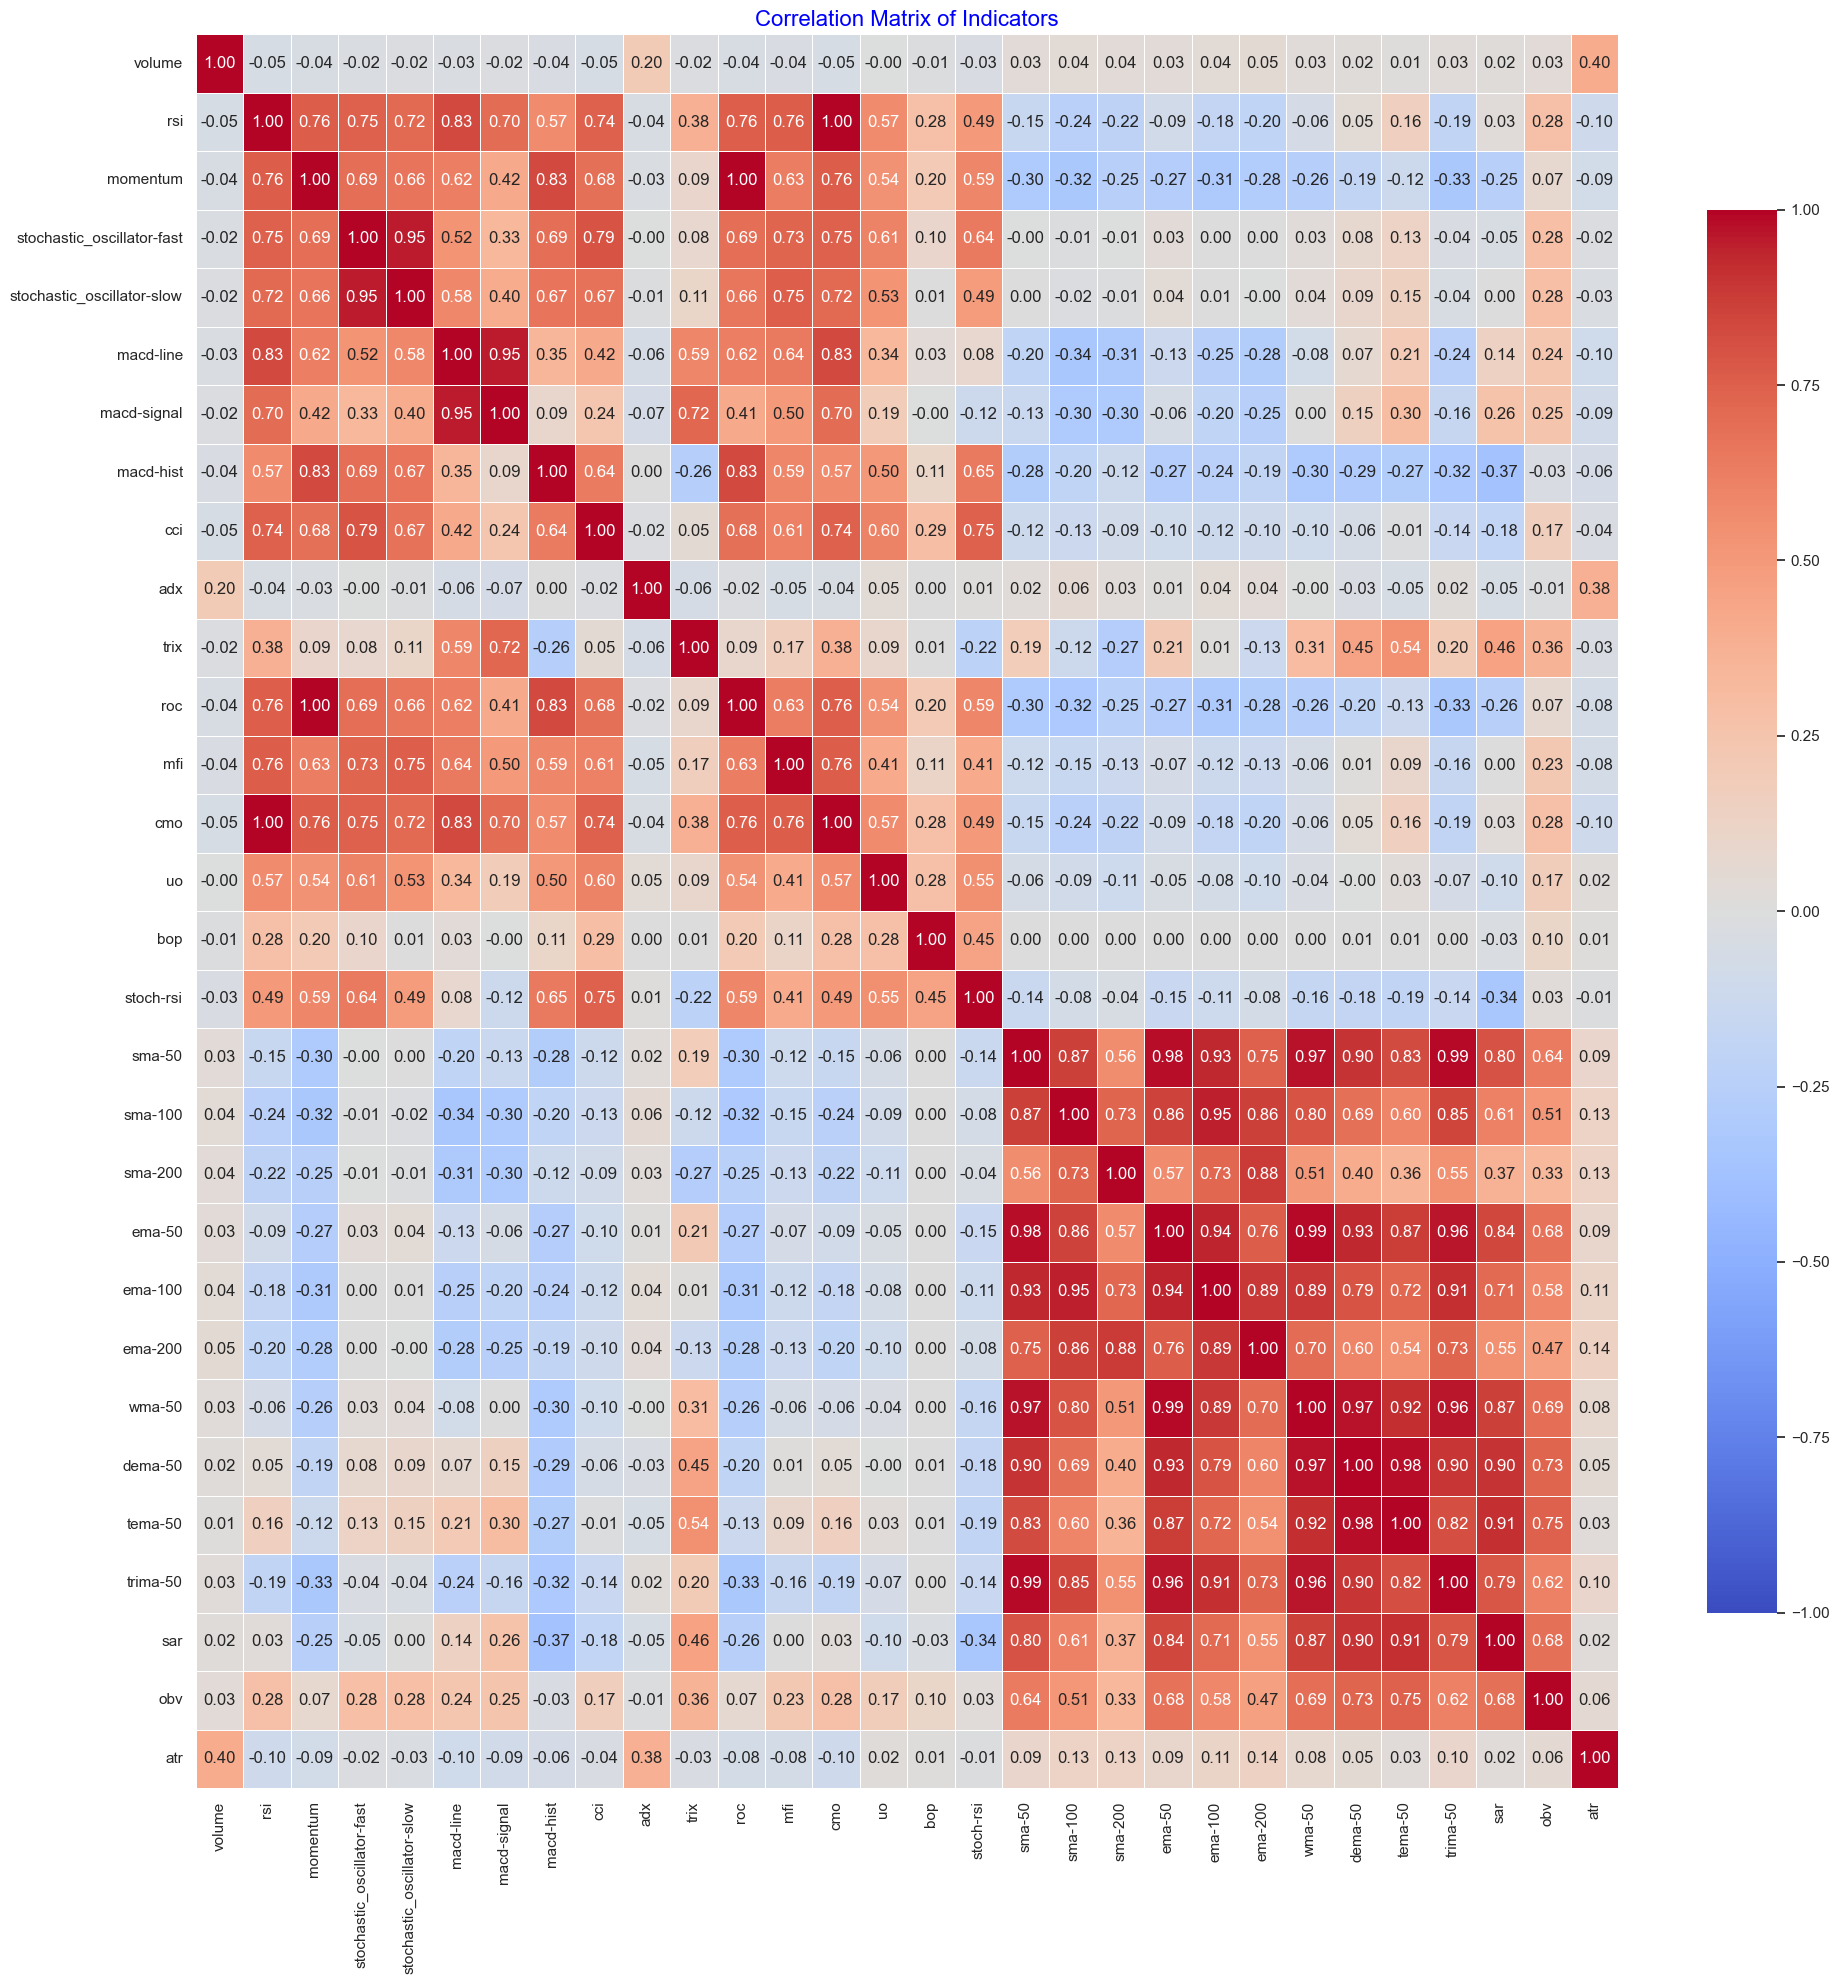

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    annot=True,          # Show numbers
    fmt=".2f",           # 2 decimal places
    cmap='coolwarm',     # Red-Blue color scheme
    vmin=-1, vmax=1,     # Scale from -1 to 1
    linewidths=0.5,      # White lines between squares
    cbar_kws={"shrink": 0.8} # Adjust color bar size
)

plt.title("Correlation Matrix of Indicators", fontsize=16, color='blue')
plt.xticks(rotation=90) # Rotate x labels
plt.yticks(rotation=0)  # Keep y labels straight
plt.tight_layout()
plt.show()

1. Here, the correlation between RSI and CMO is 1, so we keep RSI.
2. We see momentum indicators are clustering, so we use only RSI and MFI.
3. We see that the moving averages are clustering, so we use ema 50, tema 50, and sma 200
4. Volume, atr, adx are providing most unique info